# Graphs

## Graph Terminologies
**Degree of a Vertex:** The total number of edges incident on a vertex. There are two types of degrees:

**In-Degree:** The total number of incoming edges of a vertex.

**Out-Degree:** The total number of outgoing edges of a vertex.

**Parallel Edges:** Two undirected edges are parallel if they have the same end vertices. Two directed edges are parallel if they have the same starting and ending vertices.

**Self Loop:** This occurs when an edge starts and ends on the same vertex.

**Adjacency:** Two vertices are said to be adjacent if there is an edge connecting them directly.



There are two common types of graphs:

1. Undirected
2. Directed

The two most common ways to represent a graph are:

1. Adjacency Matrix
2. Adjacency List

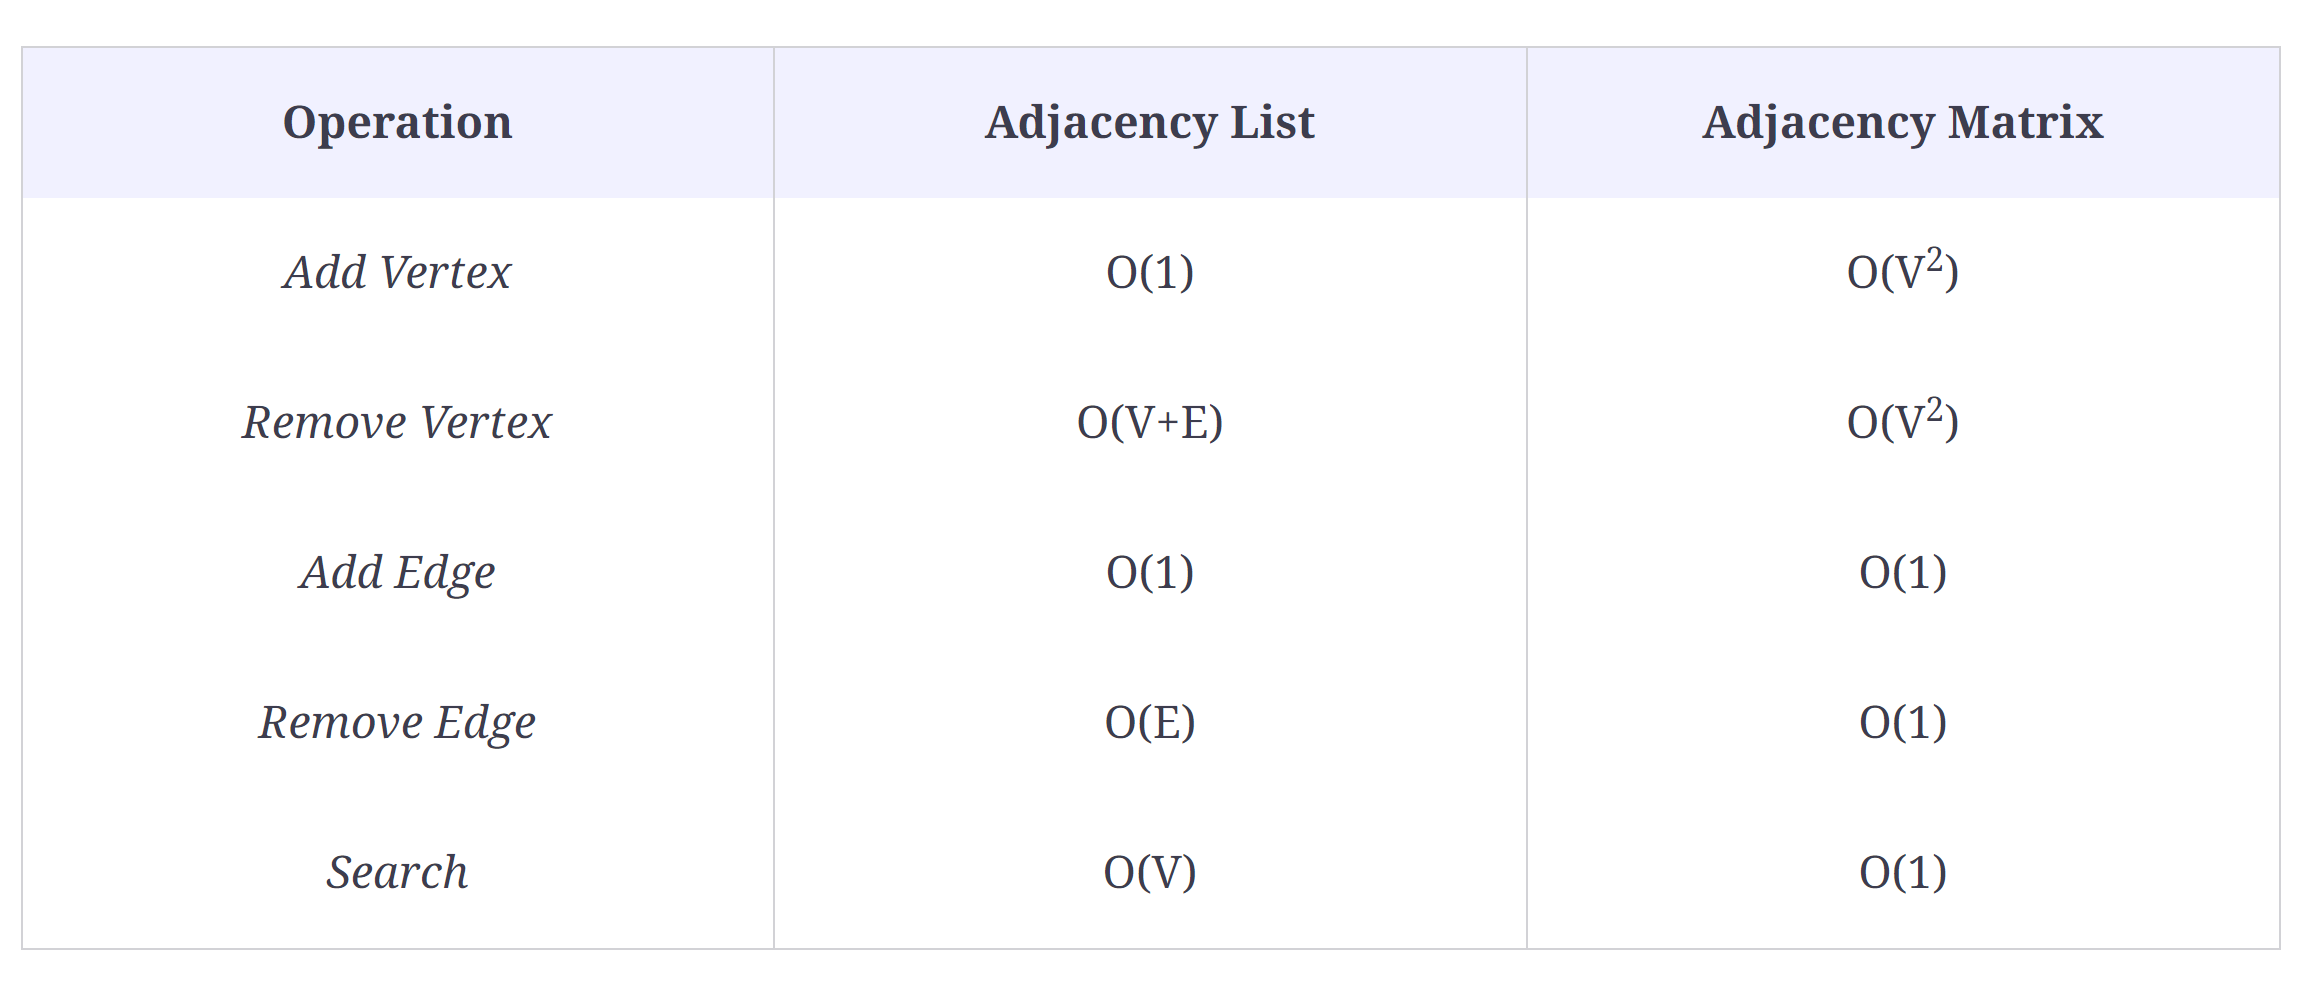

## Graph traversal algorithms

1. Breadth First Search (BFS)
2. Depth First Search (DFS)

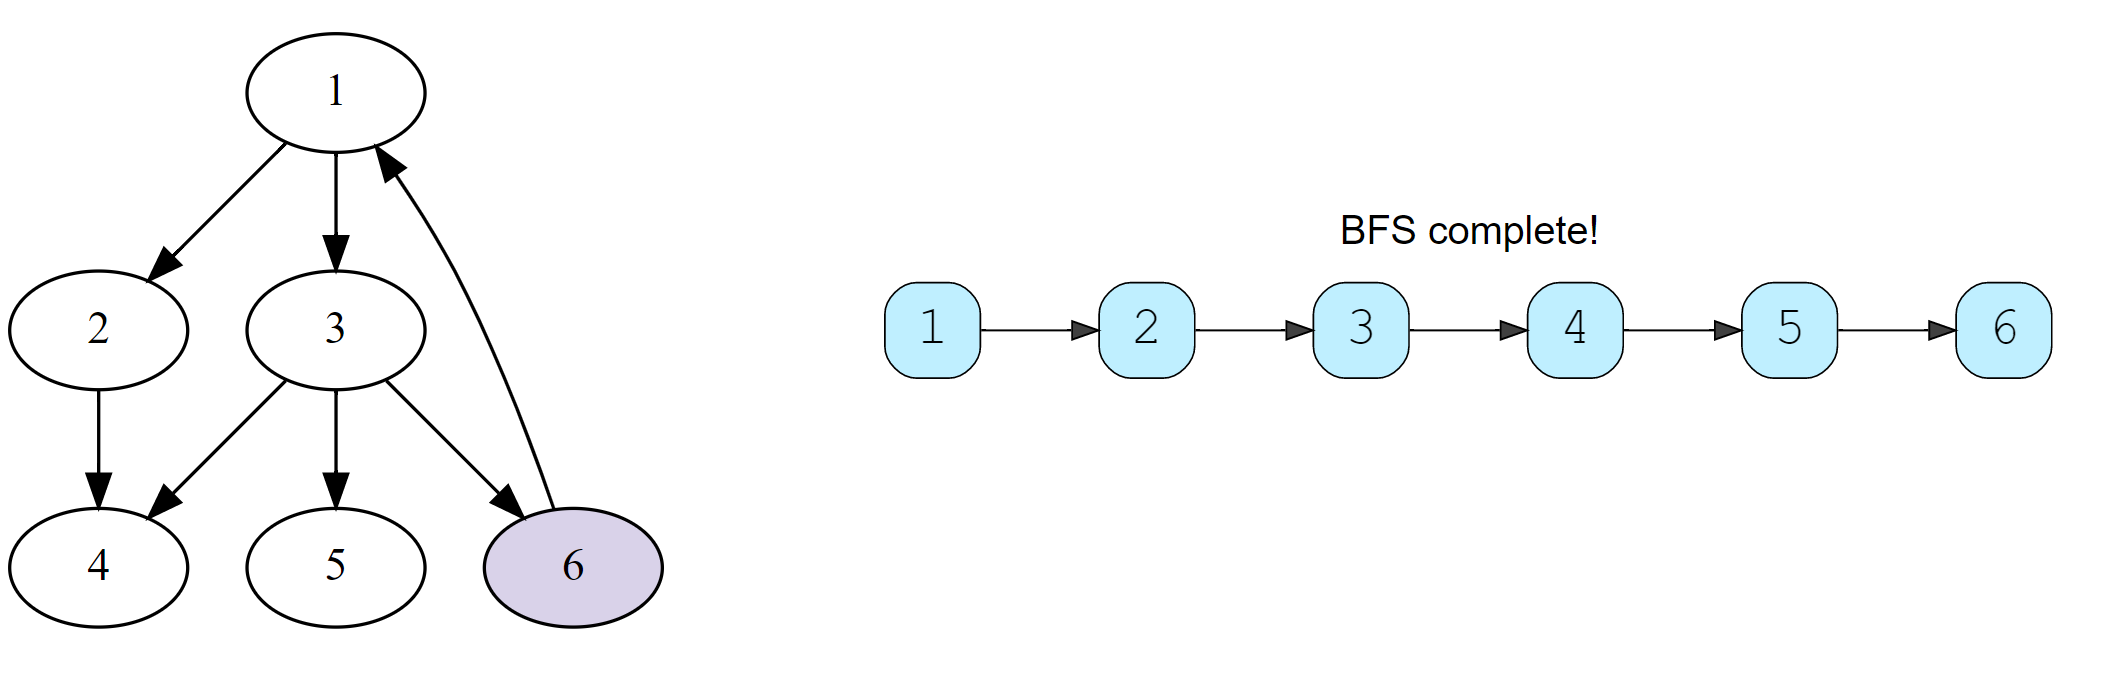

**DFS**

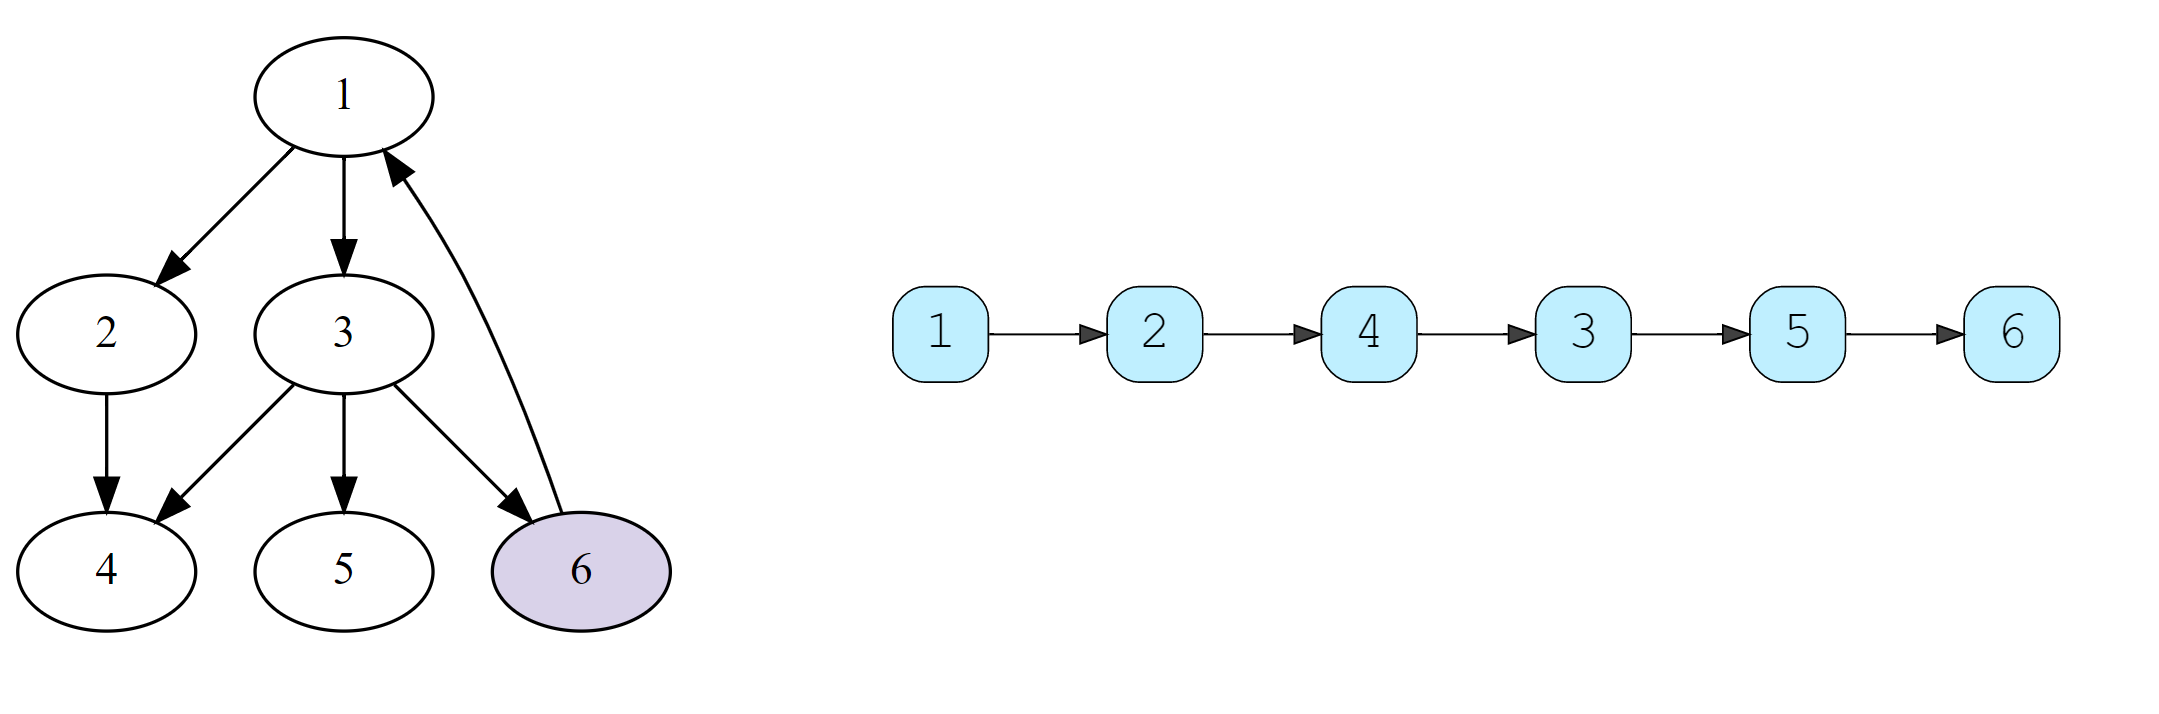

### BFS implementation

In [2]:
import collections
'''
Breadth first search for a directed graph
'''
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def addEdge(self,u,v):
        self.graph[u].append(v)

    def BFS(self,start_node):
        # initialize visited list
        visited = set()

        # For BFS, queue is used
        queue = collections.deque()

        # 1. Add to queue and mark the node as visited
        queue.append(start_node)
        visited.add(start_node)

        while queue:
            node = queue.popleft() # O(N). Instead can use deque() which makes it O(1)
            
            # add vertices which are edges to start node(2)
            for nei in self.graph[node]:
                if nei not in visited:
                    queue.append(nei)
                    visited.add(nei)


g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
# g.addEdge(3, 3)
g.BFS(2)


### DFS implementation

In [3]:
'''
Depth first search for a directed graph
For an undirected graph, you'll add a reverse edge
self.graph[v].append(u) at line 14
'''
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def addEdge(self,u,v):
        self.graph[u].append(v)

    # 1. Visit one vertex, go to one of its adjacent vertex and then repeat
    def DFS(self,s):
        visited = set()
        
        self.DFS_helper(s, visited)

    def DFS_helper(self, v, visited):
        print(v)
        visited.add(v)
        
        for i in self.graph[v]:
            if i not in visited:
                self.DFS_helper(i, visited)

g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
# g.addEdge(3, 3)

g.DFS(1)


1
2
0
3


### [Clone graph](https://leetcode.com/problems/clone-graph/)

In [ ]:
'''
BFS and clone each graph. Store node: clone node in a hashmap
Update the adjacency list of each cloned node using the original node's adjacency list. 

'''

class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node':
        # BFS
        if not node:
            return

        def BFS(node):
            visited = set()
            queue = collections.deque()
            # add node to the queue
            queue.append(node)
            # update visited
            visited.add(node)
            while queue:
                node = queue.popleft()

                # clone the node
                clone_node = Node()
                clone_node.val = node.val
                hashmap[node] = clone_node

                for nei in node.neighbors:
                    if nei not in visited:
                        visited.add(nei)
                        queue.append(nei)

        hashmap = {}
        BFS(node)
        for key, val in hashmap.items():
            for nei in key.neighbors:
                c_node = hashmap[nei]
                val.neighbors.append(c_node)

        return hashmap[node]

## DFS

### [Number of Islands](https://leetcode.com/problems/number-of-islands/)

In [ ]:
'''
Time complexity : O(MN) where M is the number of rows and N is the number of columns.

Space complexity : worst case O(M N) in case that the grid map is filled with lands where DFS goes by M×N deep
'''
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        def dfs(image, i,j):
            
            if i < 0 or i >= len(grid) or j < 0 or j >= len(grid[0]) or grid[i][j] != '1':
                return
            
            # update the value so you dont go into recursive loop
            grid[i][j] = '#'
            # move in 4 directions
            for x,y in move(i,j):
                dfs(grid, x, y)

          
        def move(i,j):
            directions  = [[0,1],[1,0],[-1,0],[0,-1]]
            for x,y in directions:
                if 0 <= i + x < row or 0 <= j + y < col:
                    yield i + x, j + y
        
        row = len(grid)
        col = len(grid[0])
        count = 0
        for i in range(len(grid)):
            # traversing through a row
            for j in range(len(grid[0])):
                if grid[i][j] == '1':
                    dfs(grid, i , j)
                    count += 1
        return count     
'''
Follow up: Try union find algorithm
'''

### [Number of distinct islands](https://leetcode.com/problems/number-of-distinct-islands/)

In [ ]:
'''
Idea: To map any island to the coordinates [(0,0),(0,1), (1,0),(1,1)]
'''


class Solution:
    def numDistinctIslands(self, grid: List[List[int]]) -> int:
        # base case:
        if not grid:
            return 0

        distinct = set()

        for i in range(len(grid)):
            # traversing through a row
            for j in range(len(grid[0])):
                self.path = []
                if grid[i][j] == 1:
                    self.dfs(grid, i, j, -i, -j)
                    # print(path)
                    distinct.add(tuple(self.path))

        return len(distinct)

    def dfs(self, grid, i, j, x, y):
        # boundary condiitons

        if 0 <= i < len(grid) and 0 <= j < len(grid[0]) and grid[i][j] == 1:

            # Visited node values are changed
            self.path.append((i + x, j + y))
            grid[i][j] = 0
            # print(self.path)
            # Move into 4 directions
            self.dfs(grid, i + 1, j, x, y)
            self.dfs(grid, i - 1, j, x, y)
            self.dfs(grid, i, j + 1, x, y)
            self.dfs(grid, i, j - 1, x, y)

## BFS

### [Rotting oranges](https://leetcode.com/problems/rotting-oranges/)

In [ ]:
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        row, col = len(grid), len(grid[0])
        
        queue = collections.deque()
        num_fresh = 0
        
        for i in range(row):
            for j in range(col):
                
                # check for fresh oranges
                if grid[i][j] == 1:
                    num_fresh += 1
                # add rotten oranges to queue 
                elif grid[i][j] == 2:
                    queue.append((i,j))
                
        mins = 0        
        directions = [[1,0],[0,1],[-1,0],[0,-1]]        
        while queue:
            
            for _ in range(len(queue)):
                i,j = queue.popleft()
                # check for all four directions for fresh oranges
                
                for x, y in directions:
                    if 0<= i+x < row and 0<= j+y < col:
                        
                        if grid[i+x][j+y] == 1:
                            
                            grid[i+x][j+y] = 2
                            num_fresh -= 1
                            queue.append((i+x,j+y))
                        
            mins += 1
            if num_fresh == 0:
                break
        
        return mins if num_fresh == 0 else -1
                

### [Shortest Bridge](https://leetcode.com/problems/shortest-bridge/)

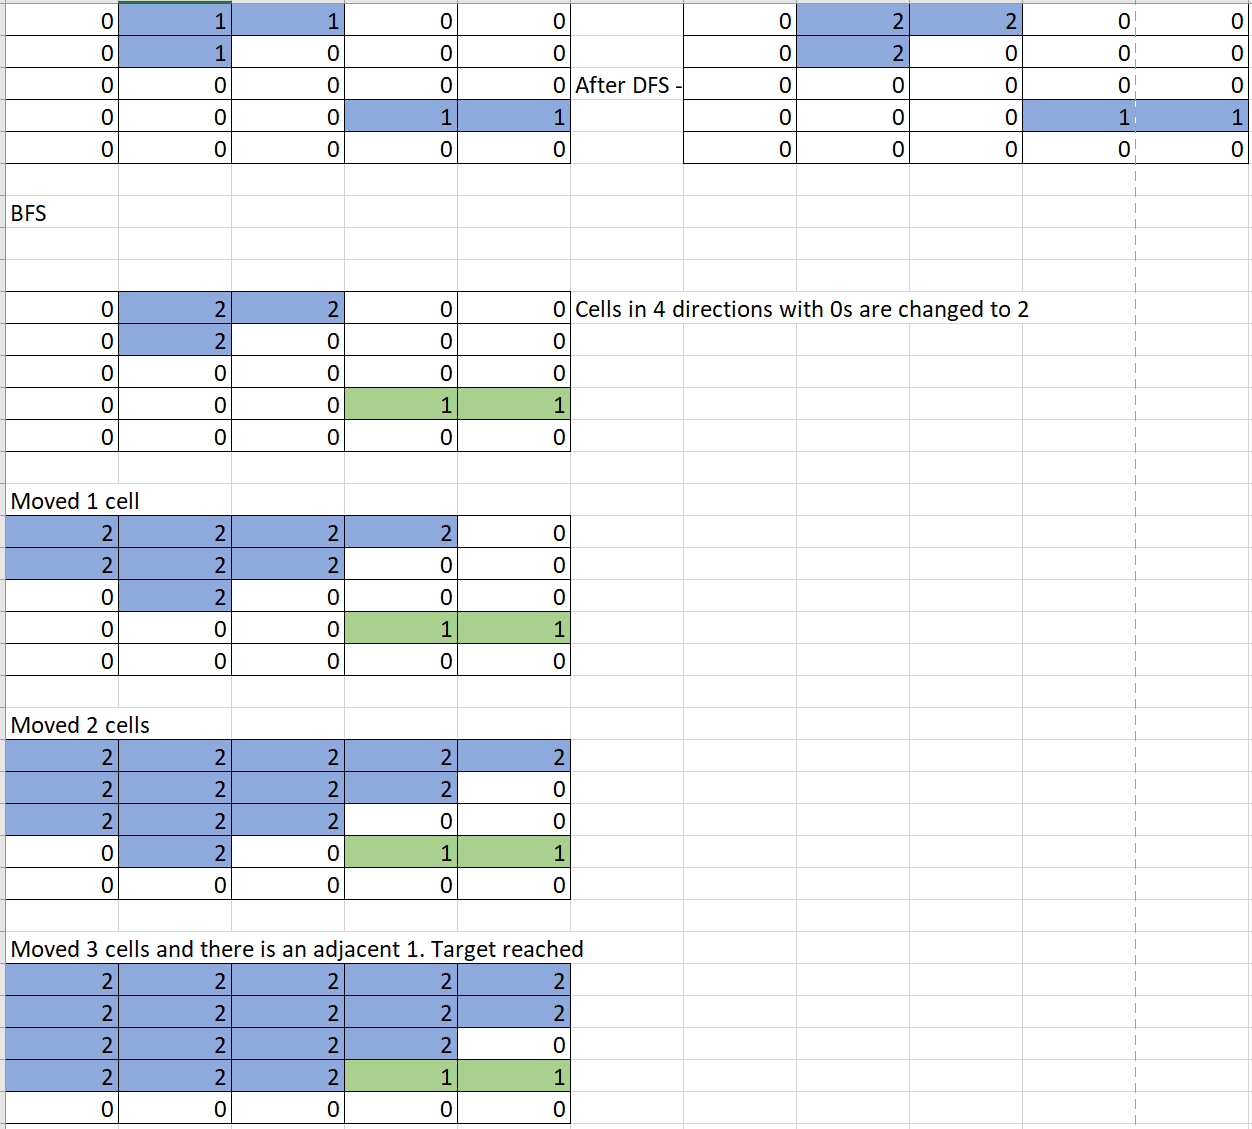

In [ ]:
class Solution:
    def shortestBridge(self, A: List[List[int]]) -> int:
        
        '''
        DFS + BFS
        In DFS, store the positions of the first island
        So we have a list of starting states and are end state would be any (i,j) with a 1 (second island)
        
        Using BFS we can find the shortest path between a start state and an end state
        '''
        
        def dfs(A, i,j):
            
            if i < 0 or i >= len(A) or j < 0 or j >= len(A[0]) or A[i][j] != 1:
                return
            
            A[i][j] = 2
            self.pos.append((i,j))
            for x,y in directions:
                dfs(A, i+x, j+y)
            return self.pos 
        
        self.pos = collections.deque()
        
        
        directions = [[0,1],[0,-1],[1,0],[-1,0]]
        flag = False
        for i in range(len(A)):
            for j in range(len(A[0])):
                if A[i][j] == 1:
                    start_states = dfs(A,i,j)
                    flag = True
                    break
            if flag:
                break
                
        r = len(A)
        c = len(A[0])
        
        shortest_bridge = 0
        '''
        BFS for shortest path 
        
        '''
        while start_states:
            num_states = len(start_states)
            
            # for each start state check 4 directions for a 1
            for _ in range(num_states):
                i,j = start_states.popleft()
                
                for x,y in directions:
                    if i+x < 0 or i+x >= r or j+y < 0 or j+y >= c or A[i+x][j+y] == 2:
                        continue
                    # reached an island
                    if A[i+x][j+y] == 1:
                        return shortest_bridge
                    
                    # adding all newly visited cells with 0s
                    start_states.append((i+x,j+y))
                    # changing its value to not visit again
                    A[i+x][j+y] = 2
            # increment as we have moved 1 cell in all directions
            shortest_bridge += 1
            
        return -1

### [As far from land as possible](https://leetcode.com/problems/as-far-from-land-as-possible/)

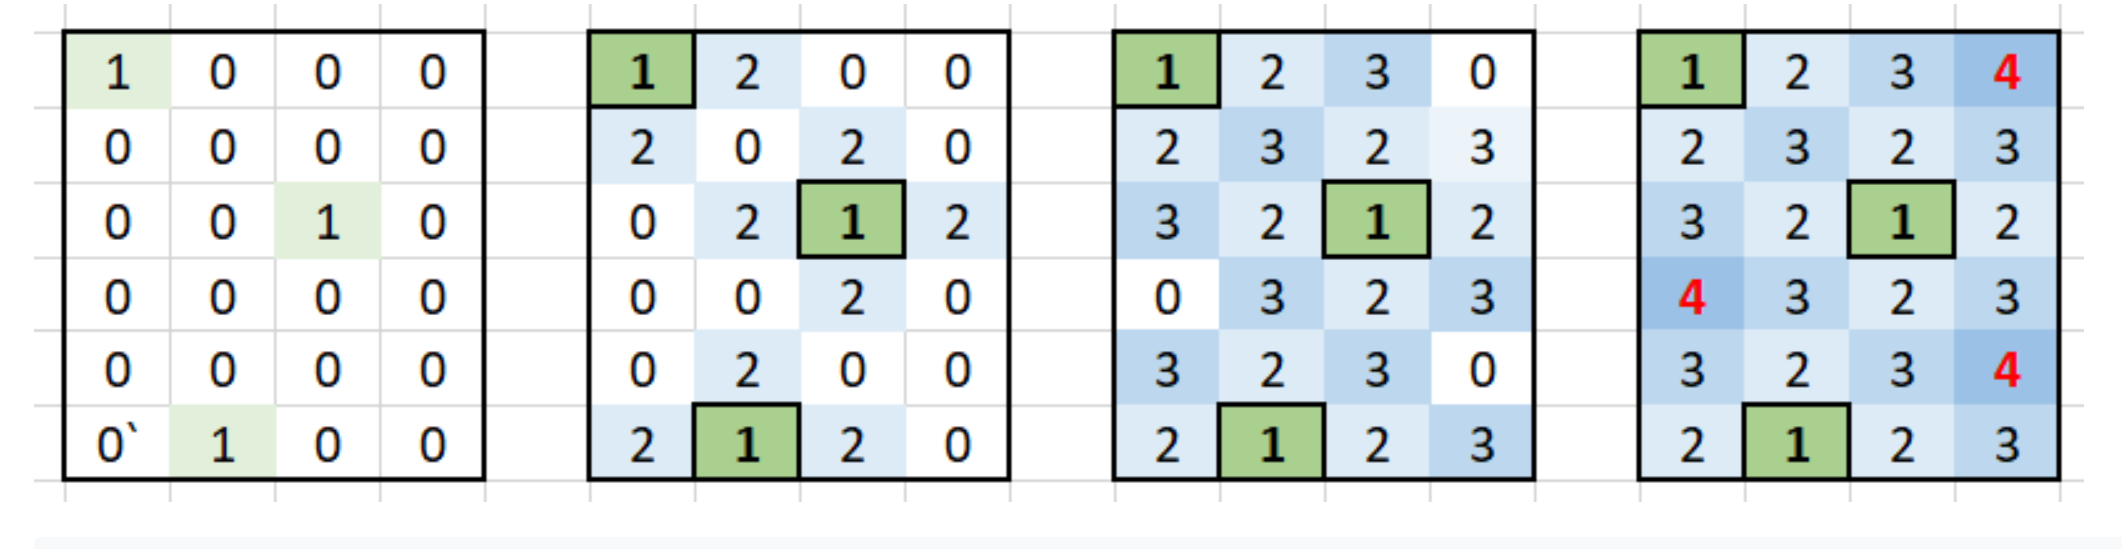

In [ ]:
class Solution:
    def maxDistance(self, grid: List[List[int]]):
        directions = [[0, 1], [0, -1], [-1, 0], [1, 0]]
        r = len(grid)
        c = len(grid[0])

        # store the land positions
        land = collections.deque([(i, j) for i in range(r) for j in range(c)
                                  if grid[i][j] == 1])
        if len(land) == r * c or len(land) == 0: return -1  # No water or no land
        
        dist = 0

        while land:
            num = len(land)

            for _ in range(num):
                i, j = land.popleft()

                for x, y in directions:
                    if (0 <= i + x < r and 0 <= j + y < c and grid[i + x][j + y] == 0):

                        grid[i + x][j + y] = 1
                        land.append((i + x, j + y))

            dist += 1
        return dist - 1

## Cycle detection

### Detect a cycle in a directed graph

In [ ]:
'''
Idea: Exploring and explored. 

'''
def hasCycle(node, exploring, explored):

    if node in exploring:
        return True
    if node in explored:
        return False

    exploring.add(node)
    # Its neighbors
    for nei in self.graph[node]:
        if hasCycle(nei, exploring, explored):
            return True

    explored.add(node)
    exploring.remove(node)
    return False

### Detect a cycle in an undirected graph

In [6]:
from collections import defaultdict
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def addEdge(self,u,v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def hasCycle(self, node):
        visited = set()

        print(self.isCycle(node, visited, -1))

    def isCycle(self,node, visited, parent):

        visited.add(node)
        for nodenext in self.graph[node]:
            if(nodenext!=parent):
                if nodenext in visited:
                    return True
                if self.isCycle(nodenext,visited, node):
                    return True
        return False



g = Graph()
g.addEdge(1, 2)
g.addEdge(2, 3)
g.addEdge(3, 4)
g.addEdge(4, 5)
g.addEdge(5, 2)
g.hasCycle(1)


True


## Topological sort

**Using DFS**

**Using indegree concept**

### [Course schedule](https://leetcode.com/problems/course-schedule/)

In [ ]:
'''
Approach:

Time complexity: O(V+E)
Space complexity: O(V+E)

Algorithm:
1. Check for cycle in the directed graph
In degree concept (BFS)
'''

from collections import defaultdict
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
       
        # prerequisites is the [u,v] (edges)

        # detect a cycle in the graph
        # initialize every node's indegree to 0
        indegree = [0] * numCourses
        
        graph = defaultdict(list)

        # create adjacency list
        for pr in prerequisites:
            graph[pr[1]].append(pr[0])
            # as there is an edge into pr[0] its indegree is incremented. 
            indegree[pr[0]] += 1

        '''
        BFS 
        Add node to the queue only when its indegree is 0
        1. Pop nodes with indegree 0 and decrement its neighbors indegree.
        example: 1 -> 2 -> 3 
        indegree of node 1 is 0
        pop: removing the edge 1 -> 2 so indegree of 2 is decremented. 
        '''
        queue = []

        for vertex in range(len(indegree)):
            if indegree[vertex] == 0:
                queue.append(vertex)

        count = 0

        while queue:
            
            course = queue.pop(0)

            # check for popped vertex neighbors and decrement their indegree
            for nei in graph[course]:
                indegree[nei] -= 1

                if indegree[nei] == 0:
                    queue.append(nei)

            count += 1
        # if number of nodes popped equal to num of courses then no cycle. 
        return count == numCourses


In [ ]:
'''
Idea: DFS with cycle detection in a directed graph. 

Cycle detection: 
1. If a node is in exploring state and the node is revisted then there is a cycle. 
2. If a node is in explored state and node is revisted means there is no cycle as all its neighbors are visited. 
TC: O(V+E) as we visit every vertex and edge. 
SC: O(V+E) for graph 
'''
import collections
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        def hasCycle(node, exploring, explored):
            
            if node in exploring:
                return True
            if node in explored:
                return False
            
            exploring.add(node)
            # Its neighbors
            for nei in self.graph[node]:
                if hasCycle(nei, exploring, explored):
                    return True
                
            explored.add(node)
            exploring.remove(node)
            return False
        
        # create a graph
        self.graph = collections.defaultdict(list)
        for course_1, course_2 in prerequisites:
            # directed graph
            self.graph[course_1].append(course_2)
            
        
        explored = set()
        exploring = set()
        for node in list(self.graph):
            if hasCycle(node, exploring, explored):
                return False
        return True
                

### [Course schedule 2](https://leetcode.com/problems/course-schedule-ii/)

In [ ]:
'''
Approach: Topological sort
Difficulties faced:
Steps to resolve Difficulties:
Time complexity: O(V+E)
Space complexity: O(V)

Algorithm:

'''

from collections import defaultdict
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List:
        # num of courses = num of vertices
        # prerequisites is the [u,v] (edges)

        # detect a cycle in the graph
        indegree = [0] * numCourses
        graph = defaultdict(list)
        result = []
        # create adjacency list
        for pr in prerequisites:
            # pr[1] = vertex
            # pr[0] = adj vertex
            graph[pr[1]].append(pr[0])
            indegree[pr[0]] += 1

        # push only those vertices whose indegree is 0
        queue = []

        for vertex in range(len(indegree)):
            # if indegree[i] is 0, add to queue
            if indegree[vertex] == 0:
                queue.append(vertex)

        count = 0

        while queue:
            # pop
            v = queue.pop(0)
            result.append(v)
            # check for popped vertex neighbors and decrement their indegree
            for n in graph[v]:
                indegree[n] -= 1

                if indegree[n] == 0:
                    queue.append(n)

            # as we visited a node
            count += 1
        #print(result)
        return result if count == numCourses else []


In [ ]:
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
           
        ## RC ##
        ## APPROACH : GRAPH / DFS ##
        ## Similar to 207. COURSE SCHEDULE
        
        # DETECT CYCLE IN DIRECTED GRAPH.        
        def isCycle(node, graph, exploring, explored):
            
            if(node in exploring): # Cycle detected. If you are still exploring and found the same element again in exploring.
                return True
            
            if(node in explored):                       
                return False
            
            exploring.add(node)                         # mark this node as visited.
            for currNode in graph[node]:                # visit all children of this node.
                if(isCycle(currNode, graph, exploring, explored)):
                    return True                        # if one of its childs returns, its already visited
            
            explored.append(node)    
            exploring.remove(node)
            return False
            
        graph = collections.defaultdict(list)           
        for i in range(numCourses):                     
            graph[i] = []
            
        for item in prerequisites:
            graph[item[1]].append(item[0])
        
        explored = []                                    # To keep track of explored nodes in the graph
        exploring = set()                                # still in exploring, not yet finished.
        
        for node in list(graph):                         # watch out => list(graph)
            if(node not in explored):
                if(isCycle(node, graph, exploring, explored)):
                    return []                            # cycle found.
                    
                else:
                    if(len(explored) == numCourses):
                        return explored[::-1]
        return explored[::-1]

## Minimum spanning tree

### Kruskal's algorithm

### Djikstra's algorithm

### Floyd Warshall algorithm

## Medium problems

### Generate all unique paths from source to destination

In [1]:
'''

'''

def unique_paths(start_node, end_node):

    def dfs(node, visited, path, all_paths):

        path.append(node)

        visited.add(node)
        if node == end_node:
            all_paths.append(list(path))

        for nei in graph[node]:
            if nei not in visited:
                dfs(nei, visited, path, all_paths)
        # backtrack
        path.pop()
        visited.remove(node)


    graph = {'A': ['B', 'C'],
         'B': ['A', 'D', 'E'],
         'C': ['A', 'F'],
         'D': ['B'],
         'E': ['B', 'F'],
         'F': ['C', 'E']}
    all_paths = []
    visited = set()
    dfs(start_node, visited, [], all_paths)
    return (all_paths)

print(unique_paths('A', 'D'))


[['A', 'B', 'D'], ['A', 'C', 'F', 'E', 'B', 'D']]


### [Reconstruct itinerary](https://leetcode.com/problems/reconstruct-itinerary/)

In [ ]:
'''
Eulirean path algorithm
'''
class Solution:
    def findItinerary(self, tickets: List[List[str]]) -> List[str]:
        from collections import defaultdict
        self.flightMap = defaultdict(list)

        for ticket in tickets:
            origin, dest = ticket[0], ticket[1]
            self.flightMap[origin].append(dest)

        for origin, itinerary in self.flightMap.items():
            # Note that we could have multiple identical flights, i.e. same origin and destination.
            itinerary.sort(reverse=True)

        self.result = []
        self.DFS('JFK')

        return self.result[::-1]

    def DFS(self, origin):
        destlist = self.flightMap[origin]
        while destlist:
            nextDest = destlist.pop()
            self.DFS(nextDest)

        self.result.append(origin)
        
'''
Follow up: How do u select the starting airport? 
Ans: Indegree of the airport which is 0
'''

### [Evaluate division](https://leetcode.com/problems/evaluate-division/)

In [ ]:
class Solution:
    def calcEquation(self, equations: List[List[str]], values: List[float], queries: List[List[str]]) -> List[float]:
        if len(equations) == 0:
            return 
        def dfs(node, end_node, val, visited):
            if node == end_node and end_node in graph:
                self.res.append(val)
                return True
            
            for nei in graph[node]:
                if nei[0] not in visited:
                    val = val * nei[1]
                    visited.add(nei[0])
                    if dfs(nei[0], end_node, val, visited):
                        return True
                    else:
                        visited.remove(nei[0])
                        val = val / nei[1]
            return False 
        
        
        # Build graph
        graph = collections.defaultdict(list)
        for node, val in zip(equations, values):
            graph[node[0]].append((node[1], val))
            graph[node[1]].append((node[0], 1/val))
        print(graph)
        
        
        
        
        self.res = []
        
        for start, end in queries:
            visited = set()
            visited.add(start)
            val = 1
            if not dfs(start, end, val, visited):
                self.res.append(-1)  
        return self.res 
        

### [Is graph bipartite](https://leetcode.com/problems/is-graph-bipartite/)

In [ ]:
class Solution:
    def isBipartite(self, graph: List[List[int]]) -> bool:
        # graph coloring
        def BFS(node):
            queue = []
            
            color[node] = 0
            queue.append(node)
            while queue:
                n = queue.pop(0)
                c = color[n]
                for nei in graph_struct[n]:
                
                    if color[nei] == c:
                        return False
                    if color[nei] == -1 and color[nei] != c:
                        queue.append(nei)
                        color[nei] = 1-c
            return True
                        
                        
        graph_struct = collections.defaultdict()
        color = {}
        
        for i in range(len(graph)):
            graph_struct[i] = graph[i]
            color[i] = -1
        
        vertices = list(graph_struct.keys())
        start_node = 0
        
        # edge case if first node has no adjacent nodes
        for i in range(len(vertices)):
            
            if color[i] == -1:
                if not BFS(i):
                    return False
                
        return True 

### [Graph valid tree](https://leetcode.com/problems/graph-valid-tree)

In [ ]:
class Solution:
    def validTree(self, n: int, edges: List[List[int]]) -> bool:
        self.graph = collections.defaultdict(list)

        for e in edges:
            self.graph[e[0]].append(e[1])
            self.graph[e[1]].append(e[0])

        visited = set()
        # if cycle then not a tree
        if self.hasCycle(0, visited, -1):
            return False
        # if all nodes are not connected
        if len(visited) != n:
            return False
        return True
    
    # undirected cycle detection
    def hasCycle(self, node, visited, parent):

        visited.add(node)
        for neighbor in self.graph[node]:
            if neighbor not in visited:
                if self.hasCycle(neighbor, visited, node):
                    return True
            elif parent != neighbor:
                return True
        return False

### [path-with-maximum-minimum-value](https://leetcode.com/problems/path-with-maximum-minimum-value)

In [ ]:
class Solution:
    def maximumMinimumPath(self, A: List[List[int]]) -> int:
        '''
        Time: O(MN log MN)
        space: O(MN)
        '''
        row = len(A)
        col = len(A[0])

        maxheap = []
        heappush(maxheap, (-A[0][0], 0, 0))

        visited = set()

        directions = [[0, 1], [1, 0], [0, -1], [-1, 0]]

        while maxheap:
            val, i, j = heapq.heappop(maxheap)
            if i == row - 1 and j == col - 1:
                return -val
            for x, y in directions:
                if i + x >= 0 and i + x < row and j + y >= 0 and j + y < col and (i+x, j+y) not in visited:
                    visited.add((i + x,j + y))
                    heapq.heappush(maxheap,
                                   (max(val, -A[i + x][j + y]), i + x, j + y))
        return -1

### [number-of-connected-components-in-an-undirected-graph](https://leetcode.com/problems/number-of-connected-components-in-an-undirected-graph)

In [ ]:
class Solution:
    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        graph = collections.defaultdict(list)
        for u, v in edges:
            graph[u].append(v)
            graph[v].append(u)

        def dfs(node, visited):
            visited.add(node)

            for nei in graph[node]:
                if nei not in visited:
                    dfs(nei, visited)

        count = 0
        visited = set()
        for i in range(n):
            if i not in visited:
                dfs(i, visited)
                count += 1

        return count

### [connecting-cities-with-minimum-cost](https://leetcode.com/problems/connecting-cities-with-minimum-cost)

In [ ]:
class Solution:
    def minimumCost(self, N: int, connections: List[List[int]]) -> int:

        graph = collections.defaultdict(list)

        for city1, city2, cost in connections:
            graph[city1].append((cost, city2))
            graph[city2].append((cost, city1))

        queue = [(0, N)]
        visited = set()
        total_cost = 0
        
        while queue and len(visited) != N:
            cost, city = heapq.heappop(queue)
            
            if city not in visited:
                visited.add(city)
                total_cost += cost

                for cost, city in graph[city]:
                    heapq.heappush(queue, (cost, city))
        return total_cost if len(visited) == N else -1

### Cheapest flights with k stops

In [ ]:

'''
Dijkstra's algorithm
Similar to #1135. Connecting Cities With Minimum Cost

Directed graph 

Algorithm: Priority Queue to get the path with minimum cost. 
TC: O(V + ElogV) ; ElogV for minheap
SC: O(V+E)
'''

class Solution:
    def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, K: int):
    
        graph = collections.defaultdict(dict)
        
        for city1, city2, cost in flights:
            graph[city1][city2] = cost
            
        print(graph)
        minheap = [(0, src, K)]
        
        while minheap:
            cost, city1, k = heapq.heappop(minheap)
            
            if city1 == dst:
                return cost

            # if the cities are in at most k stops away add them to the heap. 
            # for city 0 there are two neighboring cities so we need to travel to a city with and we have to choose min cost to reach the destination city.

            if k >= 0:
                for nei_city in graph[city1]:
                    nei_cost = graph[city1][nei_city]
                    heapq.heappush(minheap, (cost + nei_cost, nei_city, k-1))
            
            
        return -1
            
        

### [Network-delay-time](https://leetcode.com/problems/network-delay-time)

## Hard problems

### Alien dictionary

In [ ]:
'''
Approach: Topological sort + Cycle detection

Chillar edge case: word 1 in the word list is bigger than next word and has word2 as it prefix. 

'''
class Solution:
    def alienOrder(self, words: List[str]):
        def hasCycle(node, exploring, explored):
            if node in exploring:
                return True
            if node in explored:
                return False
            exploring.add(node)
            
            for nei in graph[node]:
                if hasCycle(nei, exploring, explored):
                    return True
            result.appendleft(node)
            explored.add(node)
            exploring.remove(node)
            return False
        
        # create graph
        graph=collections.defaultdict(list)

        x,y=0,1
        while(y<len(words)):
            i=j=0
            word1,word2=words[x],words[y]
            
            # condition for chillar test case 
            if word1.startswith(word2) and len(word1) > len(word2):
                return ""
            
            while(i<len(word1) and j<len(word2)):
                if(word1[i]==word2[j]):
                    i+=1
                    j+=1
                else:
                    graph[word1[i]].append(word2[j])
                    break
            x+=1
            y+=1
        # create nodes in the graph with empty adjacency list
        all_chars=set("".join(words))
        missed_chars = all_chars - set(graph)
        
        for char in missed_chars:
            graph[char]=[]
        
        
        exploring = set()
        explored = set()
        result = collections.deque()
        for node in list(graph):
            if hasCycle(node, exploring, explored):
                return ""
        
        return "".join(result)

### [string-transforms-into-another-string](https://leetcode.com/problems/string-transforms-into-another-string)